In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('homeprices_banglore.csv')
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [4]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price', axis='columns'))
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [5]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

batch_gradient_descent

In [8]:
def batch_gradient_descent(x, y_true, epochs, learning_rate = 0.01):
    number_of_features = x.shape[1]
    w = np.ones(shape=(number_of_features))
    b=0
    total_samples = x.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        y_pred = np.dot(w , x.T) + b
        w_grad = -(2/total_samples)*(x.T.dot(y_true - y_pred))
        b_grad = -(2/total_samples)*np.sum(y_true - y_pred)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost  = np.mean(np.square(y_true - y_pred))

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

In [9]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

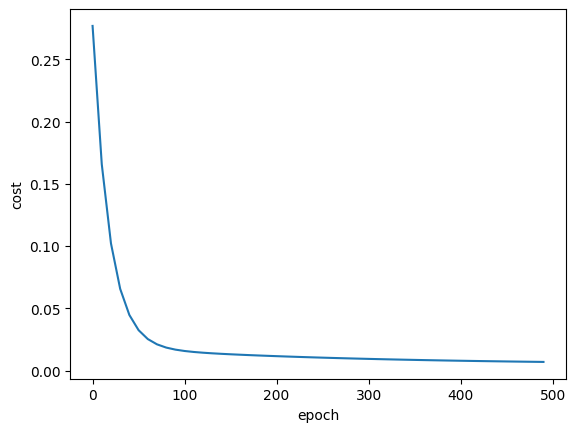

In [10]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [15]:
def predict(area, bedroom, w, b):
    scaled_x = sx.transform([[area, bedroom]])[0]
    scaled_price = w[0]*scaled_x[0] + w[1]*scaled_x[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]

In [17]:
predict(1000,2,w,b)

/opt/homebrew/var/www/python/tensorflow/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

In [18]:
predict(1500,3,w,b)

/opt/homebrew/var/www/python/tensorflow/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.47860785714694

stochastic_gradient_descent

In [21]:
import random
random.randint(0,6)

6

In [23]:
def stochastic_gradient_descent(x, y_true, epochs, learning_rate = 0.01):
    number_of_features = x.shape[1]
    w = np.ones(shape=(number_of_features))
    b=0
    total_samples = x.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        random_index = random.randint(0, total_samples-1)
        sample_x = x[random_index]
        sample_y = y_true[random_index]
        y_pred = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y - y_pred))
        b_grad = -(2/total_samples)*np.sum(sample_y - y_pred)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost  = np.mean(np.square(sample_y - y_pred))

        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list
        

In [26]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 10000)
w_sgd, b_sgd, cost_sgd

(array([0.71000933, 0.67677572]), -0.23412128815145103, 0.006105346495948767)

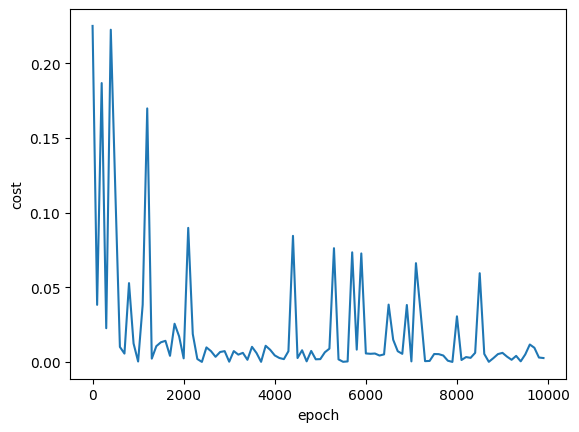

In [27]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)